In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System and file handling
import os

# Text processing
import re
from collections import Counter, defaultdict
from fuzzywuzzy import process
from itertools import combinations

In [4]:
# Load the Excel data
excel_file_path = "./CIRPASS-DPP-related-Initiatives-Dataset-2024-May-17/Results_initatives_questionnaire_for_publication_17-05-2024.xlsx"
df = pd.read_excel(excel_file_path)

# Display basic information about the data
print("Dataframe Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataframe Shape: (205, 44)
Columns: Index(['Initiative name', 'Initiative short name', 'Website',
       'Goal / USP / Benefit', 'Host organization name',
       'Host organization type', 'Solution type', 'Sector',
       'Potential for cross-sectors application ?',
       'Focus on final product or supply chain exchange', 'Market scope',
       'Current market penetration', 'Technology readiness', 'Business model',
       'Target group (e.g. data/platform user)', 'Relevance',
       'Company identification (data provider)', 't\ni\nk\nc\na\nr\n',
       'Product traceability', 'Functional and technical specifications',
       'Product material composition information',
       'Product design & service information', 'Product usage data',
       'Product repair data', 'Recycling data',
       'Circularity info & label (for consumer)',
       'Label, certification, compliance', 'Product ID: type',
       'Product ID: granularity', 'Type', 'Machine readable data carrier',
       'Resolver'

,Initiative name,Initiative short name,Website,Goal / USP / Benefit,Host organization name,Host organization type,Solution type,Sector,Potential for cross-sectors application ?,Focus on final product or supply chain exchange,...,Data transport openness level,Data packaging,Level,if advanced,Data use management,Evidence,Convenience,Data protection,Traceability,Further comments
0,3TAG,3TAG,NaN,3TAG is creating a dynamic DPP to track Scope ...,"3TAG, LTD",Private Company (Industry),Platform,Cross-sector (more than one),Yes,Both,...,proprietary,API,advanced,attribute based,enforcement,blockchain,Wallet,PETs,Integration with asset management and supply c...,NaN
1,3videnZ,3videnZ,NaN,Our 'Enriched Circular Product Passport' (CPP+...,Blockchain Certified Data,Private Company (Industry),Platform,"Cross-sector (more than one), Textile, Electro...",Yes,Final Product,...,standardized,Data transfer,advanced,role based,role based,blockchain,Wallet,Encryption,Tagging (QR),NaN
2,A Decentralized Blueprint for Digital Product ...,DPP by Digimarc & IOTA,NaN,This project was commissioned via the EU EBSI ...,Digimarc,Private Company (Industry),Platform,"Battery, Cross-sector",Yes,Final Product,...,standardized,API,advanced,role based,role based,verifiable credentials,Wallet,anonymization,"Tagging (QR), Tagging (NFC/RFID), Digital Wate...",You can fihttps://www.youtube.com/watch?v=NfJ4...
3,Acme,NaN,NaN,#OneTap Blockchain DPPs,Acme Labs,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Final Product,...,standardized,API,simple,NaN,labelling,blockchain,Wallet,anonymization,Tagging (QR),We are a platform that helps companies easily ...
4,Adetex.CS,Circlolink Digital Product Passport via RFiD T...,NaN,Washable RFiD THREADS® DPP links products from...,Adetex.CS and Adetexs UK,Private Company (Industry),"Platform, Product Data Scheme, Traceability So...",Cross-sector (more than one),Yes,Both,...,cloud platform. RFID Threads connects to brand...,Data transfer,advanced,attribute based,role based,data is collected in real-time and alerts and ...,CIRCAA Cloud Platform is an app to collect dat...,privacy is enacted from brands using and setti...,"Tagging (QR), Tagging (NFC/RFID), worlds first...",To achieve national and international inclusiv...


In [5]:
# Basic statistics and information
print(df.info())  # Column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Initiative name                                  205 non-null    object 
 1   Initiative short name                            190 non-null    object 
 2   Website                                          1 non-null      object 
 3   Goal / USP / Benefit                             192 non-null    object 
 4   Host organization name                           205 non-null    object 
 5   Host organization type                           204 non-null    object 
 6   Solution type                                    200 non-null    object 
 7   Sector                                           205 non-null    object 
 8   Potential for cross-sectors application ?        202 non-null    object 
 9   Focus on final product or supply

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values Overview:")
print(missing_data[missing_data['Missing Values'] > 0])

Missing Values Overview:
                                                 Missing Values  Percentage
Initiative short name                                        16    7.766990
Website                                                     205   99.514563
Goal / USP / Benefit                                         14    6.796117
Host organization type                                        2    0.970874
Solution type                                                 6    2.912621
Sector                                                        1    0.485437
Potential for cross-sectors application ?                     4    1.941748
Focus on final product or supply chain exchange               4    1.941748
Market scope                                                  3    1.456311
Current market penetration                                    7    3.398058
Technology readiness                                          4    1.941748
Business model                                               11

In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Display data types and unique values for each column
print("Column Data Types and Unique Values:")
for column in df.columns:
    print(f"{column}: {df[column].dtype}, Unique Values: {df[column].nunique()}")

Column Data Types and Unique Values:
Initiative name: object, Unique Values: 204
Initiative short name: object, Unique Values: 188
Website: object, Unique Values: 1
Goal / USP / Benefit: object, Unique Values: 192
Host organization name: object, Unique Values: 198
Host organization type: object, Unique Values: 19
Solution type: object, Unique Values: 33
Sector: object, Unique Values: 70
Potential for cross-sectors application ?: object, Unique Values: 2
Focus on final product or supply chain exchange: object, Unique Values: 3
Market scope: object, Unique Values: 5
Current market penetration: object, Unique Values: 3
Technology readiness: object, Unique Values: 6
Business model: object, Unique Values: 3
Target group (e.g. data/platform user): object, Unique Values: 186
Relevance: float64, Unique Values: 0
Company identification (data provider): object, Unique Values: 45
t
i
k
c
a
r
: float64, Unique Values: 0
Product traceability: object, Unique Values: 11
Functional and technical speci

In [8]:
# Summary for numerical columns
numerical_summary = df.describe()
print("Numerical Summary:")
print(numerical_summary)

# Summary for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column} - Unique Categories:")
    print(df[column].value_counts().head(10))  # Display top 10 most frequent values

Numerical Summary:
       Relevance  t\ni\nk\nc\na\nr\n  Label, certification, compliance
count        0.0                 0.0                               0.0
mean         NaN                 NaN                               NaN
std          NaN                 NaN                               NaN
min          NaN                 NaN                               NaN
25%          NaN                 NaN                               NaN
50%          NaN                 NaN                               NaN
75%          NaN                 NaN                               NaN
max          NaN                 NaN                               NaN
Initiative name - Unique Categories:
Initiative name
PlsReturnIt Inc                                                                                 2
3TAG                                                                                            1
Polytag limited                                                                              

In [9]:
# Drop columns with 100% missing values
columns_to_drop = ['Website', 'Relevance', 'Label, certification, compliance', 't\ni\nk\nc\na\nr\n']
df_cleaned = df.drop(columns=columns_to_drop)

# Fill minor missing values with placeholders or drop rows (customize per column importance)
df_cleaned['Goal / USP / Benefit'].fillna('No Description Provided', inplace=True)
df_cleaned['Solution type'].fillna('Unknown', inplace=True)
df_cleaned['Sector'].fillna('Not Specified', inplace=True)

# Check the shape of the cleaned dataset
print("Cleaned Dataframe Shape:", df_cleaned.shape)

Cleaned Dataframe Shape: (205, 40)


/var/folders/zk/xy1d6l8d4qxcmccygcsylx_80000gp/T/ipykernel_91262/352832818.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Goal / USP / Benefit'].fillna('No Description Provided', inplace=True)
/var/folders/zk/xy1d6l8d4qxcmccygcsylx_80000gp/T/ipykernel_91262/352832818.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

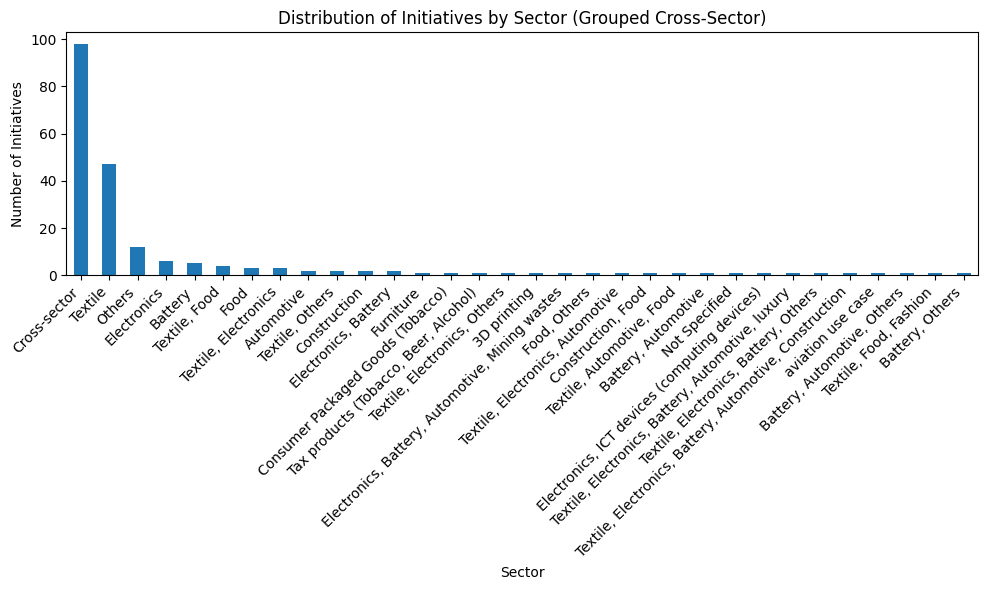

In [11]:
# Define a function to group categories containing specific keywords
def group_categories(value):
    if isinstance(value, str) and 'cross-sector' in value.lower():
        return 'Cross-sector'
    return value  # Keep other categories unchanged

# Apply the function to normalize the 'Sector' column
df_cleaned['Sector_Grouped'] = df_cleaned['Sector'].apply(group_categories)

# Recalculate the value counts after normalization
sector_counts_grouped = df_cleaned['Sector_Grouped'].value_counts()

# Plot the updated chart
plt.figure(figsize=(10, 6))
sector_counts_grouped.plot(kind='bar')
plt.title('Distribution of Initiatives by Sector (Grouped Cross-Sector)')
plt.xlabel('Sector')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

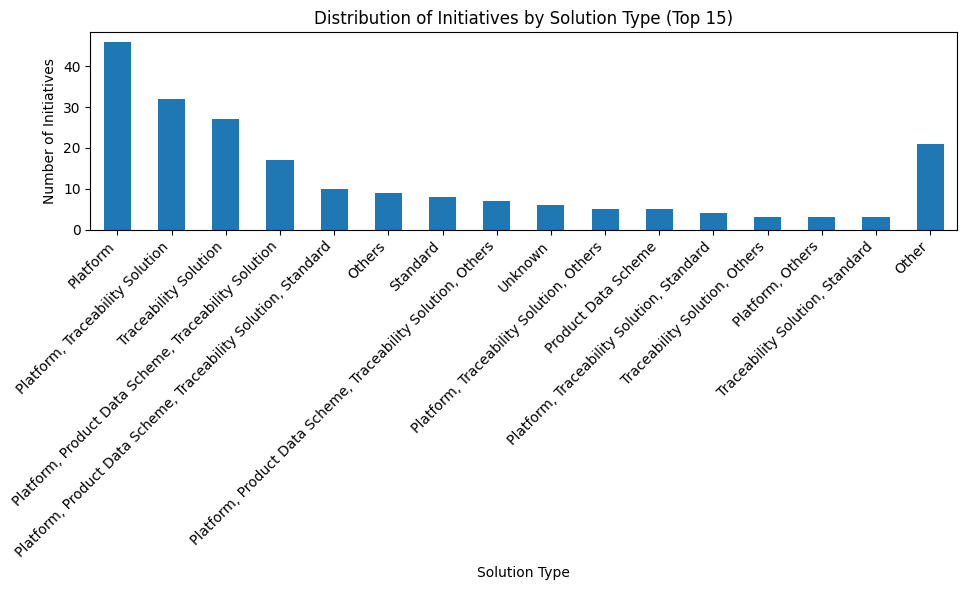

In [12]:
# Group less frequent solution types into "Other"
solution_counts = df_cleaned['Solution type'].value_counts()
top_solutions = solution_counts.head(15)  # Select the top 15 solution types
other_count = solution_counts[15:].sum()
top_solutions['Other'] = other_count  # Combine remaining solution types into "Other"

# Plot updated chart
plt.figure(figsize=(10, 6))
top_solutions.plot(kind='bar')
plt.title('Distribution of Initiatives by Solution Type (Top 15)')
plt.xlabel('Solution Type')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

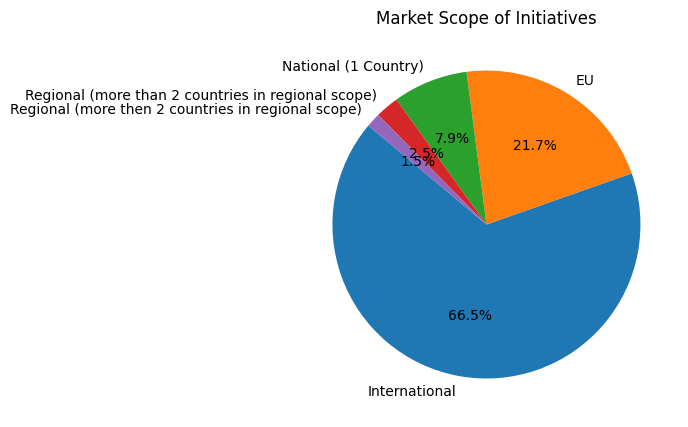

In [13]:
# Plot initiatives by Market Scope
plt.figure(figsize=(8, 5))
df_cleaned['Market scope'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Market Scope of Initiatives')
plt.ylabel('')
plt.show()


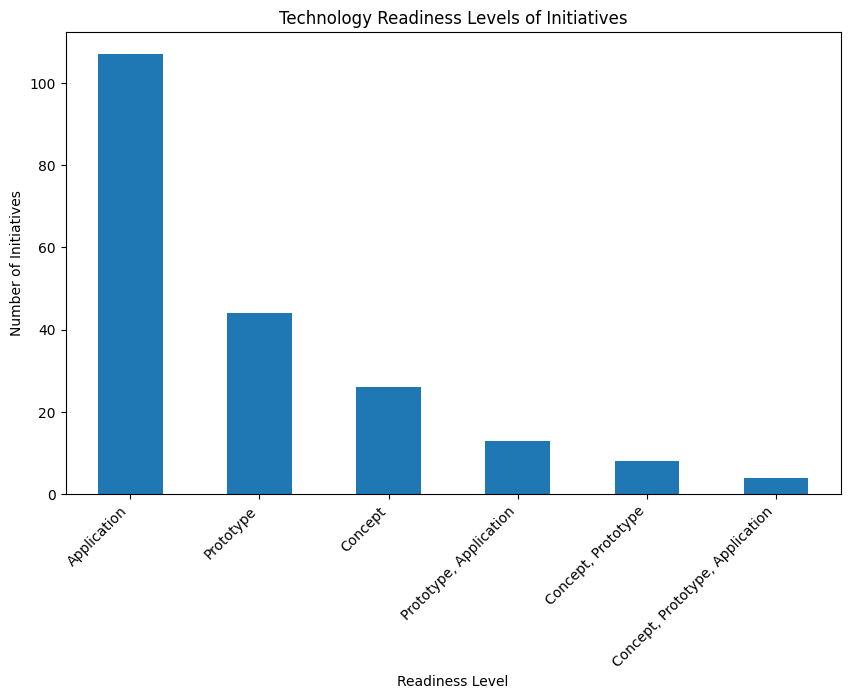

In [14]:
# Plot Technology Readiness Levels
plt.figure(figsize=(10, 6))
df_cleaned['Technology readiness'].value_counts().plot(kind='bar')
plt.title('Technology Readiness Levels of Initiatives')
plt.xlabel('Readiness Level')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# Define a function to normalize solution types without losing context
def group_solution_types_context(value):
    if isinstance(value, str):
        # Example mappings, adjust as needed
        if 'platform' in value.lower():
            return 'Platform'
        elif 'traceability' in value.lower():
            return 'Traceability Solution'
        elif 'data scheme' in value.lower():
            return 'Product Data Scheme'
        elif 'standard' in value.lower():
            return 'Standard'
        elif 'DPP details extracted from ICT devices that changes over lifespan due to repair (hardware change) or reuse (including usage counters)' in value:
            return 'Others'
        else:
            return value  # Keep other types as is
    return value

# Apply the function to normalize solution types
df_cleaned['Solution_Type_Grouped'] = df_cleaned['Solution type'].apply(group_solution_types_context)

# Verify the new column
print(df_cleaned[['Solution type', 'Solution_Type_Grouped']])

                                         Solution type  Solution_Type_Grouped
0                                             Platform               Platform
1                                             Platform               Platform
2                                             Platform               Platform
3                                             Platform               Platform
4    Platform, Product Data Scheme, Traceability So...               Platform
..                                                 ...                    ...
201                                             Others                 Others
202                              Traceability Solution  Traceability Solution
203                              Traceability Solution  Traceability Solution
204            Platform, Traceability Solution, Others               Platform
205                              Traceability Solution  Traceability Solution

[206 rows x 2 columns]


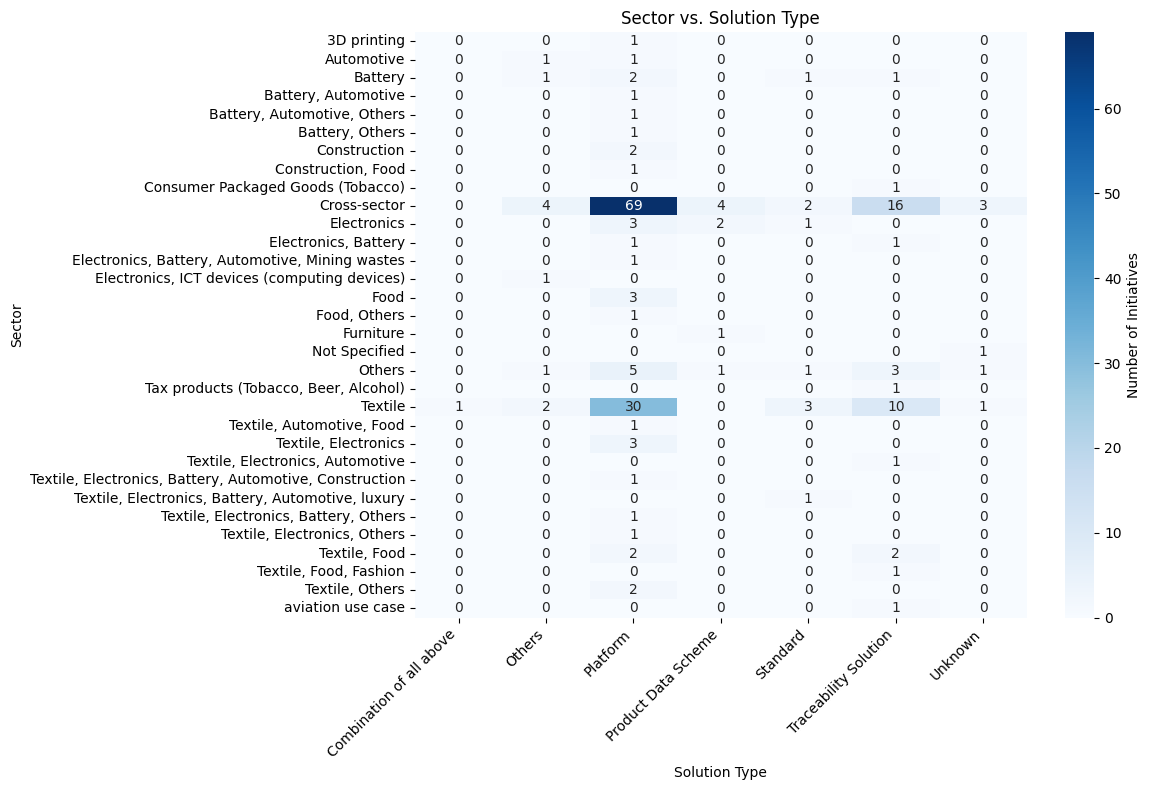

In [36]:
# Cross-tabulation: Sector vs. Solution Type
sector_solution_ct = pd.crosstab(df_cleaned['Sector_Grouped'], df_cleaned['Solution_Type_Grouped'])

# Plot as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_solution_ct, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Sector vs. Solution Type')
plt.xlabel('Solution Type')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

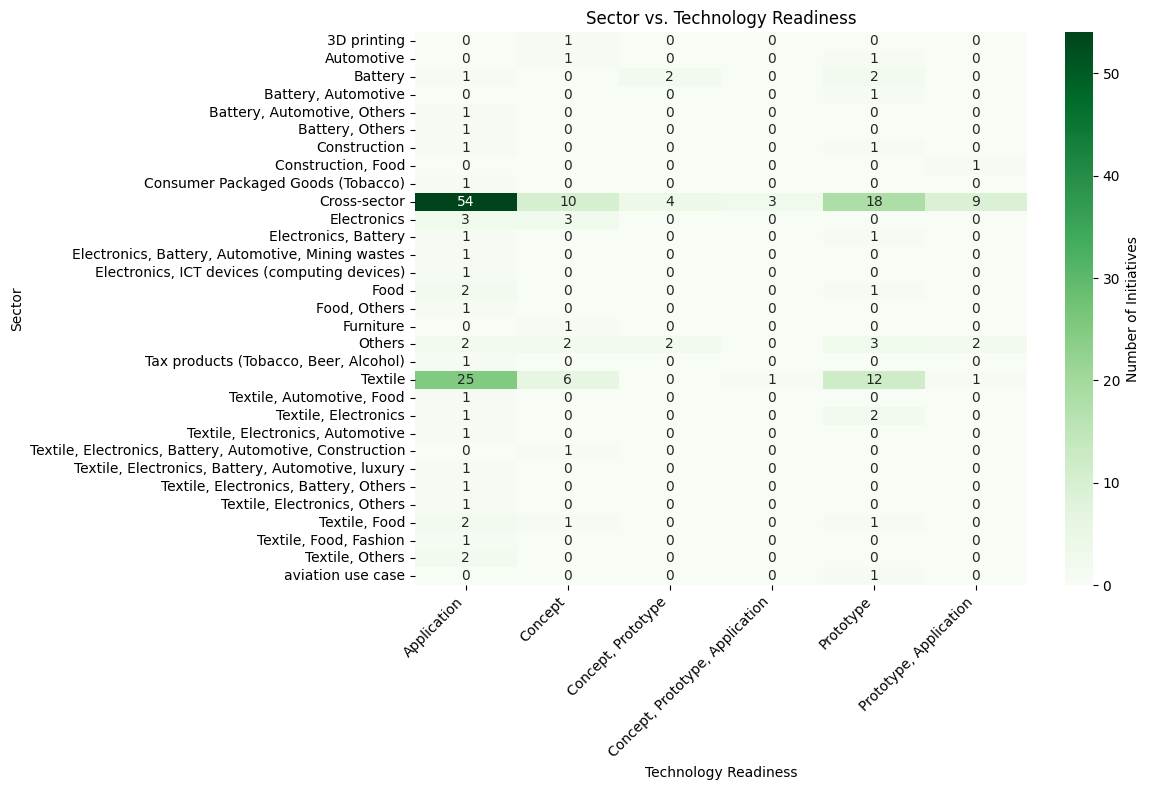

In [35]:
# Cross-tabulation: Sector vs. Technology Readiness
sector_readiness_ct = pd.crosstab(df_cleaned['Sector_Grouped'], df_cleaned['Technology readiness'])

# Plot as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_readiness_ct, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Sector vs. Technology Readiness')
plt.xlabel('Technology Readiness')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [29]:
# Define a function to standardize traceability methods
def standardize_traceability(value):
    if isinstance(value, str):
        if 'tagging' in value.lower() and 'qr' in value.lower():
            return 'Tagging (QR)'
        elif 'tagging' in value.lower() and 'nfc' in value.lower():
            return 'Tagging (NFC/RFID)'
        elif 'blockchain' in value.lower():
            return 'Blockchain-Based Traceability'
        elif 'unique' in value.lower() or 'signature' in value.lower():
            return 'Unique Signature/Identifier'
        else:
            return 'Other'
    return 'Unknown'

# Apply the function to create a standardized column
df_cleaned['Traceability_Standardized'] = df_cleaned['Traceability'].apply(standardize_traceability)

# Verify the new column
print(df_cleaned[['Traceability', 'Traceability_Standardized']].drop_duplicates())

                                          Traceability  \
0    Integration with asset management and supply c...   
1                                         Tagging (QR)   
2    Tagging (QR), Tagging (NFC/RFID), Digital Wate...   
4    Tagging (QR), Tagging (NFC/RFID), worlds first...   
5                     Tagging (QR), Tagging (NFC/RFID)   
10                             Depends on client needs   
11   Tagging (QR), Tagging (NFC/RFID), Tagging usin...   
13   Tagging (QR), 2D code plus additional, machine...   
14   Tagging (QR), Tagging (NFC/RFID), Vision AI (n...   
17                                                 Yes   
20                                                 NaN   
21    Tagging (QR), QR & Optical watermark recognition   
22                                  Tagging (NFC/RFID)   
27   Whatever the market is going to use will be in...   
30    Tagging (QR), Tagging (NFC/RFID), own technology   
31                         Tagging (QR), Self-scanning   
37   just star

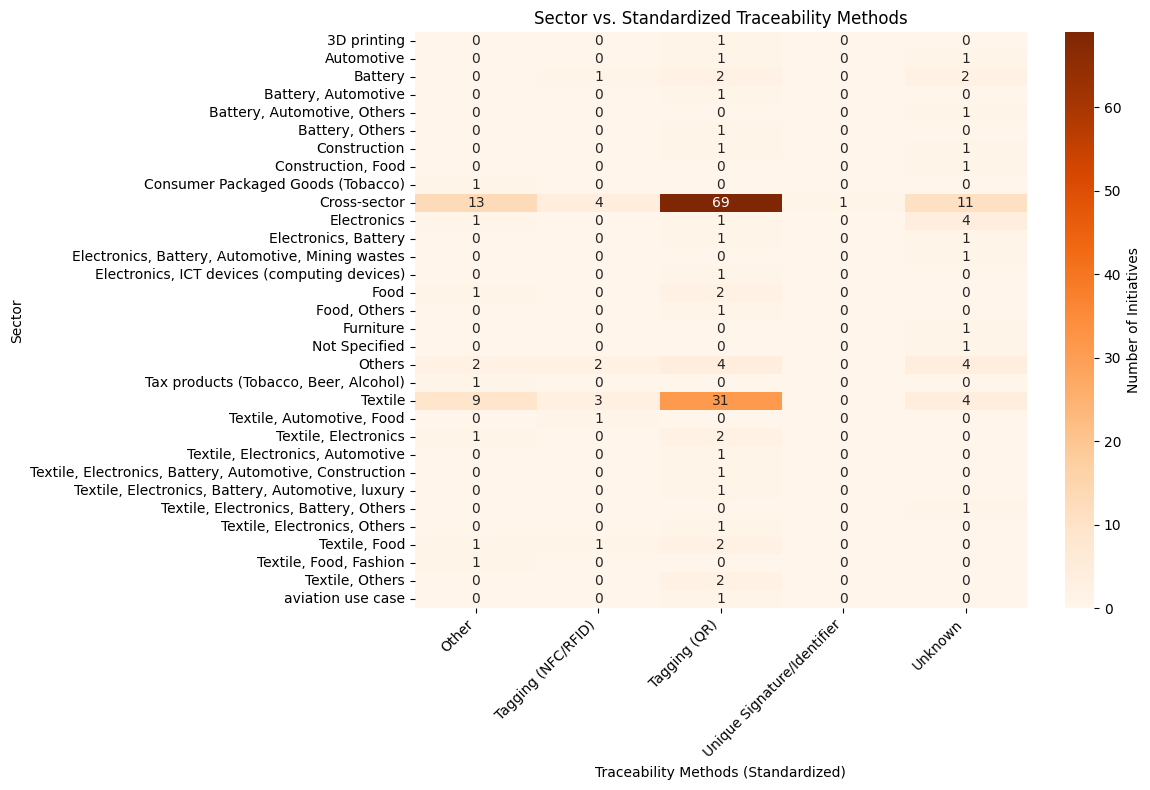

In [32]:
# Cross-tabulation: Sector vs. Standardized Traceability Methods
sector_traceability_ct = pd.crosstab(df_cleaned['Sector_Grouped'], df_cleaned['Traceability_Standardized'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_traceability_ct, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Sector vs. Standardized Traceability Methods')
plt.xlabel('Traceability Methods (Standardized)')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [42]:
# Function to map raw values to logical categories
def map_transport_openness(value):
    if isinstance(value, str):
        value_lower = value.lower()
        if "standardized" in value_lower:
            return "Standardized"
        elif "blockchain" in value_lower or "hyperledger" in value_lower:
            return "Blockchain-Based"
        elif "proprietary" in value_lower or "own technology" in value_lower:
            return "Proprietary"
        elif "api" in value_lower or "iot" in value_lower or "mobile" in value_lower:
            return "API and IoT Integration"
        elif "encrypted" in value_lower or "e2ee" in value_lower or "privacy" in value_lower:
            return "Encrypted/Privacy-Focused"
        elif "interoperable" in value_lower or "flexible" in value_lower:
            return "Interoperable/Flexible Solutions"
        elif "not developed" in value_lower or "not determined" in value_lower or "not applicable" in value_lower:
            return "Not Applicable/Under Development"
        else:
            return "Other"
    return "Unknown"

# Apply the mapping function
df_cleaned['Transport_Openness_Categorized'] = df_cleaned['Data transport openness level'].apply(map_transport_openness)

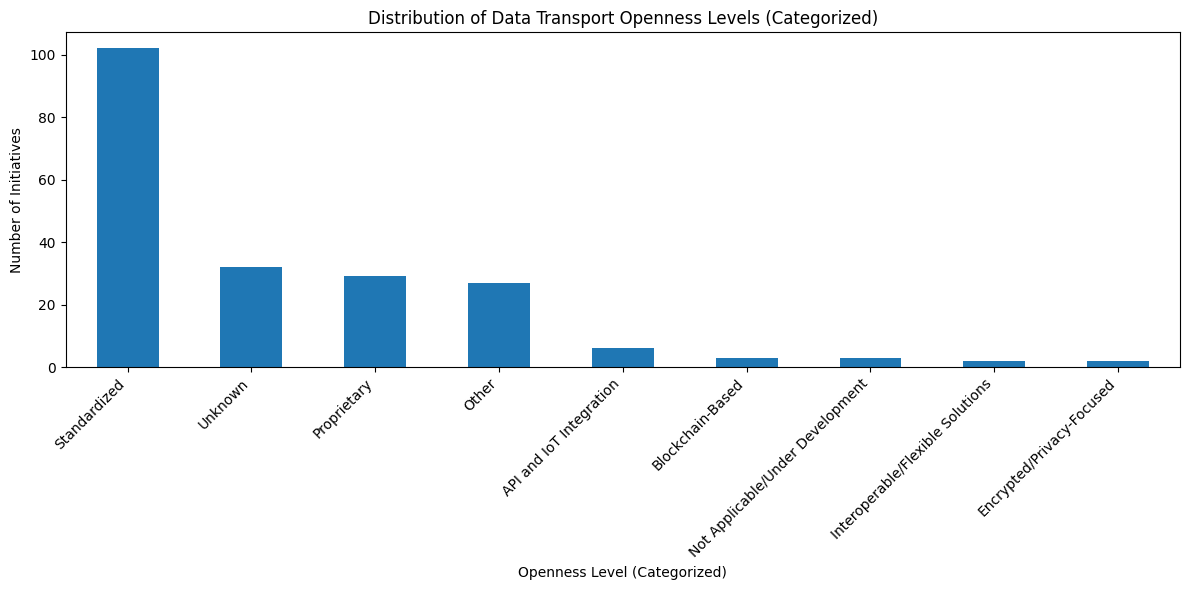

In [43]:
# Distribution of categorized transport openness levels
transport_counts_categorized = df_cleaned['Transport_Openness_Categorized'].value_counts()

# Plot the categorized data
plt.figure(figsize=(12, 6))
transport_counts_categorized.plot(kind='bar')
plt.title('Distribution of Data Transport Openness Levels (Categorized)')
plt.xlabel('Openness Level (Categorized)')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

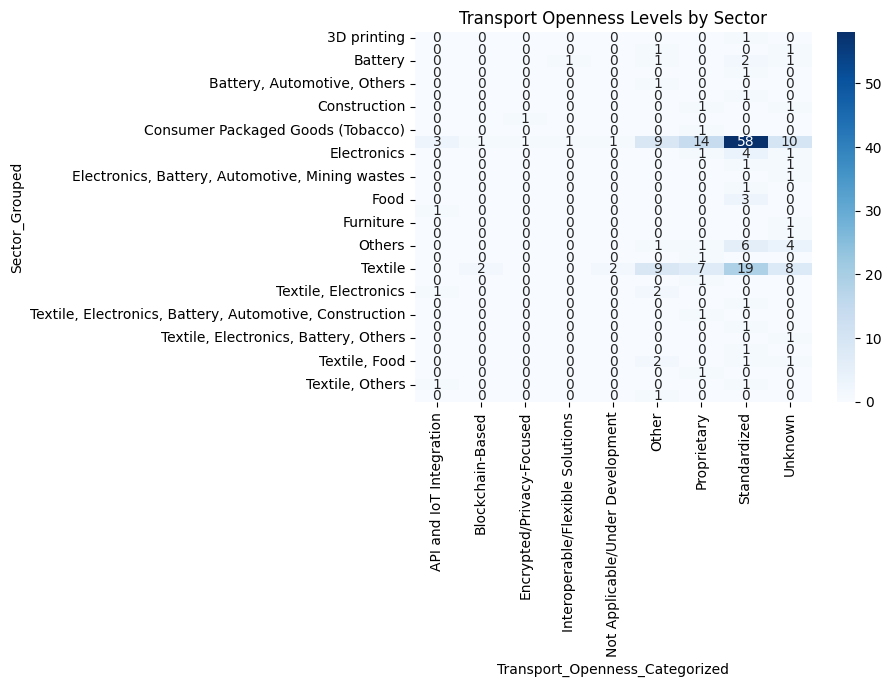

In [44]:
# Cross-tabulate Transport Openness Levels by Sector
transport_sector_ct = pd.crosstab(
    df_cleaned['Sector_Grouped'], 
    df_cleaned['Transport_Openness_Categorized']
)
sns.heatmap(transport_sector_ct, annot=True, fmt="d", cmap="Blues")
plt.title("Transport Openness Levels by Sector")
plt.show()

In [48]:
# Define a function to map raw values to logical categories
def map_data_protection(value):
    if isinstance(value, str):
        value_lower = value.lower()
        if "anonymization" in value_lower:
            return "Anonymization"
        elif "pets" in value_lower:
            return "Privacy-Enhancing Technologies (PETs)"
        elif "encryption" in value_lower or "hashing" in value_lower:
            return "Encryption"
        elif "access control" in value_lower or "role-based" in value_lower:
            return "Role-Based Access Control (RBAC)"
        elif "minimization" in value_lower:
            return "Data Minimization"
        elif "proprietary" in value_lower or "custom" in value_lower:
            return "Proprietary or Custom Solutions"
        elif "gdpr" in value_lower or "compliance" in value_lower:
            return "GDPR/Compliance Focused"
        elif "not yet" in value_lower or "research" in value_lower or "under development" in value_lower:
            return "Research/Under Development"
        else:
            return "Other/Unspecified"
    return "Unknown"

# Apply the mapping function
df_cleaned['Data_Protection_Categorized'] = df_cleaned['Data protection'].apply(map_data_protection)

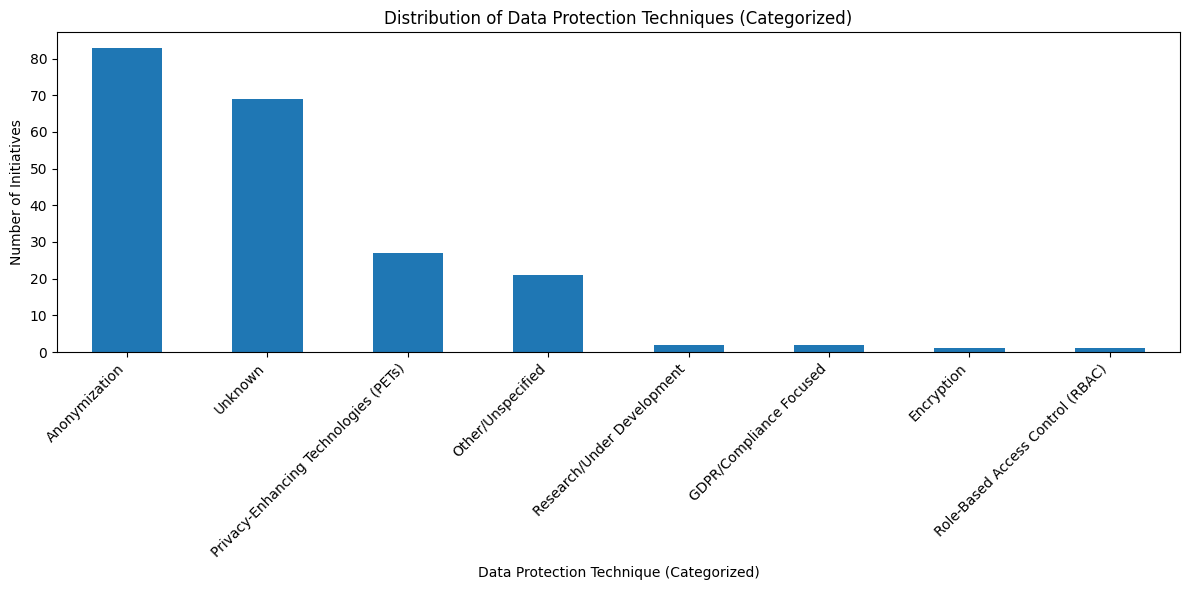

In [49]:
# Distribution of categorized data protection techniques
protection_counts_categorized = df_cleaned['Data_Protection_Categorized'].value_counts()

# Plot the categorized data protection techniques
plt.figure(figsize=(12, 6))
protection_counts_categorized.plot(kind='bar')
plt.title('Distribution of Data Protection Techniques (Categorized)')
plt.xlabel('Data Protection Technique (Categorized)')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

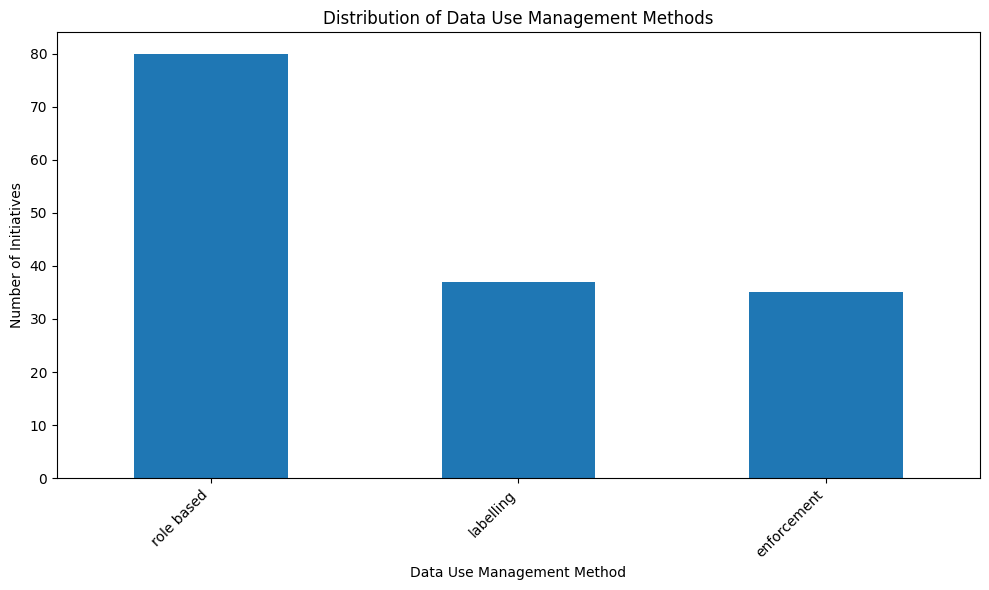

In [50]:
# Distribution of data use management methods
use_management_counts = df_cleaned['Data use management'].value_counts()

# Plot data use management methods
plt.figure(figsize=(10, 6))
use_management_counts.plot(kind='bar')
plt.title('Distribution of Data Use Management Methods')
plt.xlabel('Data Use Management Method')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

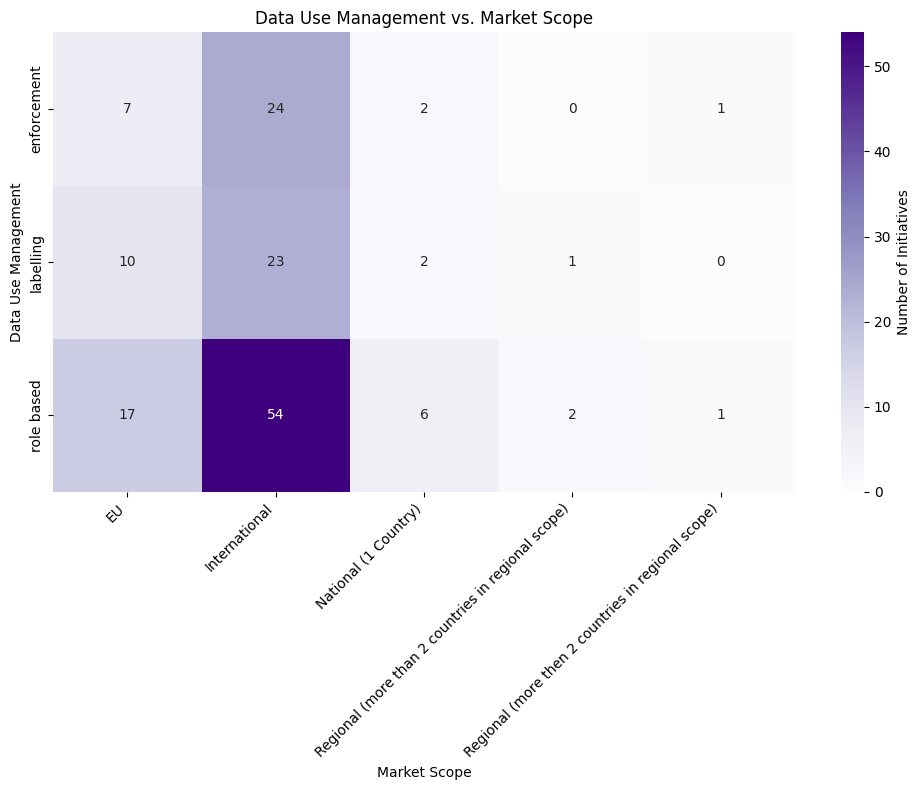

In [65]:
# Cross-tabulation: Data Use Management vs. Market Scope
data_use_market_ct = pd.crosstab(df_cleaned['Data use management'], df_cleaned['Market scope'])

# Visualize as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_use_market_ct, annot=True, fmt='d', cmap='Purples', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Data Use Management vs. Market Scope')
plt.xlabel('Market Scope')
plt.ylabel('Data Use Management')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Technology Analysis

In [52]:
# Combine technology-related columns into one
df_cleaned['Tech_Description'] = (
    df_cleaned['Solution type'].fillna('') + ' ' +
    df_cleaned['Data protection'].fillna('') + ' ' +
    df_cleaned['Traceability'].fillna('') + ' ' +
    df_cleaned['Goal / USP / Benefit'].fillna('') + ' ' +
    df_cleaned['Further comments'].fillna('')
)

In [54]:
# Tokenize and count words
words = Counter(re.findall(r'\b\w+\b', ' '.join(df_cleaned['Tech_Description'])))
most_common_words = words.most_common(50)
print(most_common_words)

[('and', 524), ('the', 458), ('to', 394), ('of', 294), ('a', 292), ('Tagging', 221), ('for', 213), ('is', 175), ('in', 170), ('data', 167), ('QR', 159), ('with', 146), ('Platform', 136), ('product', 120), ('Traceability', 120), ('on', 116), ('Solution', 114), ('RFID', 106), ('NFC', 104), ('Product', 99), ('that', 93), ('chain', 89), ('The', 85), ('anonymization', 83), ('DPP', 79), ('can', 78), ('Data', 69), ('are', 68), ('as', 67), ('supply', 65), ('products', 63), ('be', 62), ('digital', 61), ('from', 59), ('solution', 59), ('or', 56), ('We', 55), ('their', 52), ('information', 50), ('s', 50), ('traceability', 50), ('by', 50), ('Scheme', 49), ('platform', 48), ('PETs', 47), ('brands', 45), ('Digital', 44), ('an', 44), ('our', 39), ('all', 38)]


In [55]:
# Define categorization function
def categorize_technology(description):
    description_lower = description.lower()
    if 'blockchain' in description_lower or 'dlt' in description_lower:
        return 'Blockchain'
    elif 'iot' in description_lower or 'internet of things' in description_lower:
        return 'IoT'
    elif 'rfid' in description_lower or 'nfc' in description_lower or 'qr' in description_lower:
        return 'RFID/NFC'
    elif 'ai' in description_lower or 'machine learning' in description_lower:
        return 'AI/ML'
    elif 'cloud' in description_lower or 'saas' in description_lower:
        return 'Cloud-Based Solutions'
    elif 'encryption' in description_lower or 'pet' in description_lower or 'anonymization' in description_lower:
        return 'Data Privacy & Security'
    else:
        return 'Other/Uncategorized'

# Apply categorization
df_cleaned['Technology_Category'] = df_cleaned['Tech_Description'].apply(categorize_technology)

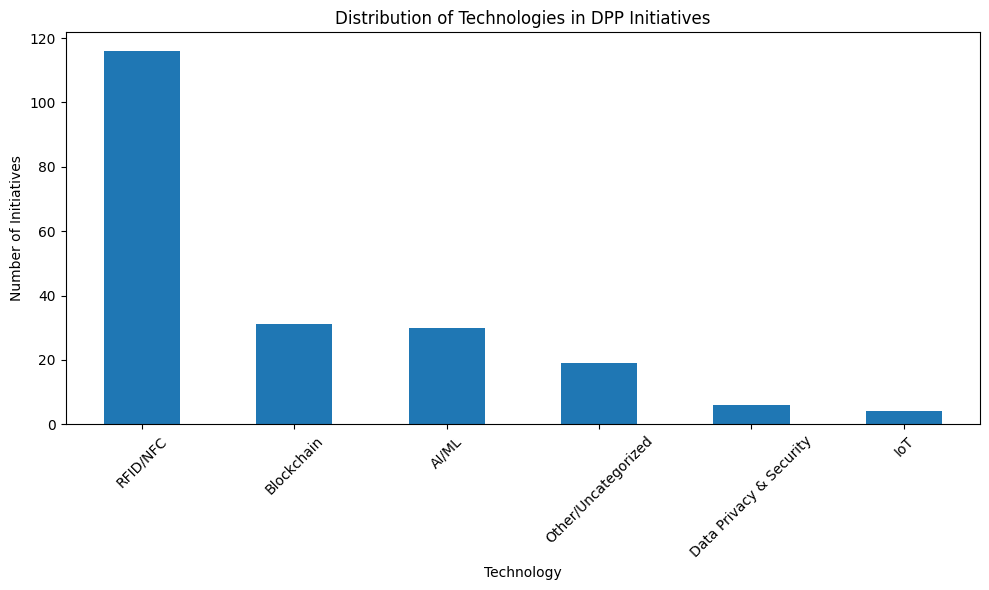

In [56]:
# Plot technology categories
tech_counts = df_cleaned['Technology_Category'].value_counts()
tech_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Technologies in DPP Initiatives')
plt.xlabel('Technology')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

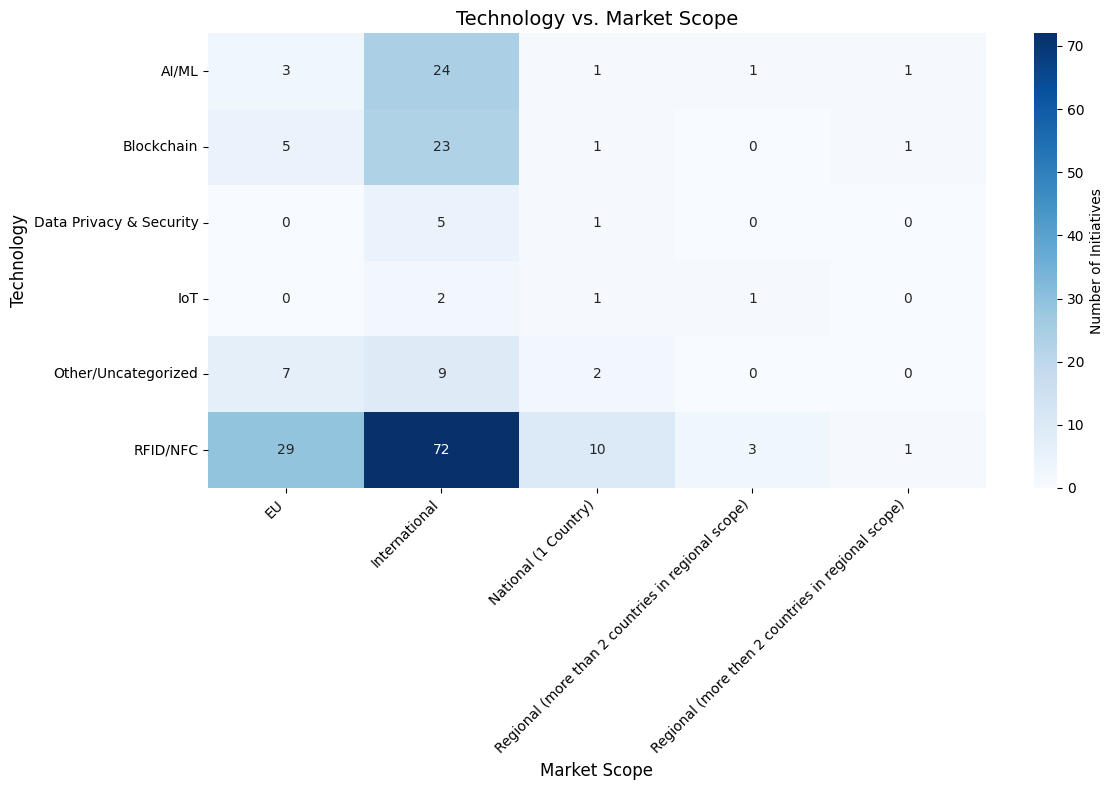

In [61]:
# Cross-tabulate Technology vs. Market Scope
tech_market_ct = pd.crosstab(df_cleaned['Technology_Category'], df_cleaned['Market scope'])

plt.figure(figsize=(12, 8))

sns.heatmap(tech_market_ct, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Initiatives'})

plt.title('Technology vs. Market Scope', fontsize=14)
plt.xlabel('Market Scope', fontsize=12)
plt.ylabel('Technology', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [62]:
# Cross-tabulation: Technology vs. Sector
technology_sector_ct = pd.crosstab(df_cleaned['Technology_Category'], df_cleaned['Sector_Grouped'])

# Display the crosstab
technology_sector_ct.head()

Sector_Grouped,3D printing,Automotive,Battery,"Battery, Automotive","Battery, Automotive, Others","Battery, Others",Construction,"Construction, Food",Consumer Packaged Goods (Tobacco),Cross-sector,...,"Textile, Electronics","Textile, Electronics, Automotive","Textile, Electronics, Battery, Automotive, Construction","Textile, Electronics, Battery, Automotive, luxury","Textile, Electronics, Battery, Others","Textile, Electronics, Others","Textile, Food","Textile, Food, Fashion","Textile, Others",aviation use case
Technology_Category,,,,,,,,,,,,,,,,,,,,,
AI/ML,0,1,1,0,0,0,0,1,1,13,...,0,0,0,0,0,0,0,0,0,0
Blockchain,0,0,0,0,0,0,1,0,0,16,...,0,1,1,0,0,0,1,0,0,1
Data Privacy & Security,0,0,0,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,1,0,0
IoT,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
Other/Uncategorized,0,0,1,0,0,0,1,0,0,8,...,0,0,0,0,1,0,0,0,0,0


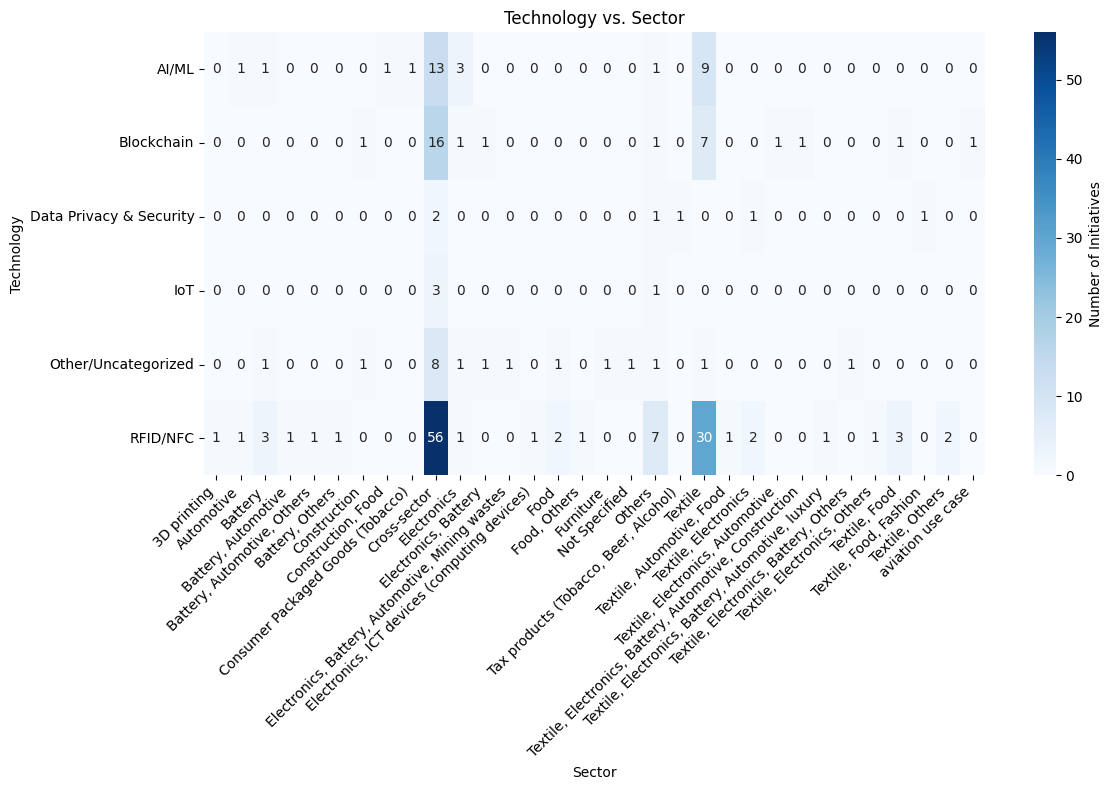

In [63]:
# Visualization: Heatmap of Technology vs. Sector
plt.figure(figsize=(12, 8))
sns.heatmap(technology_sector_ct, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Technology vs. Sector')
plt.xlabel('Sector')
plt.ylabel('Technology')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

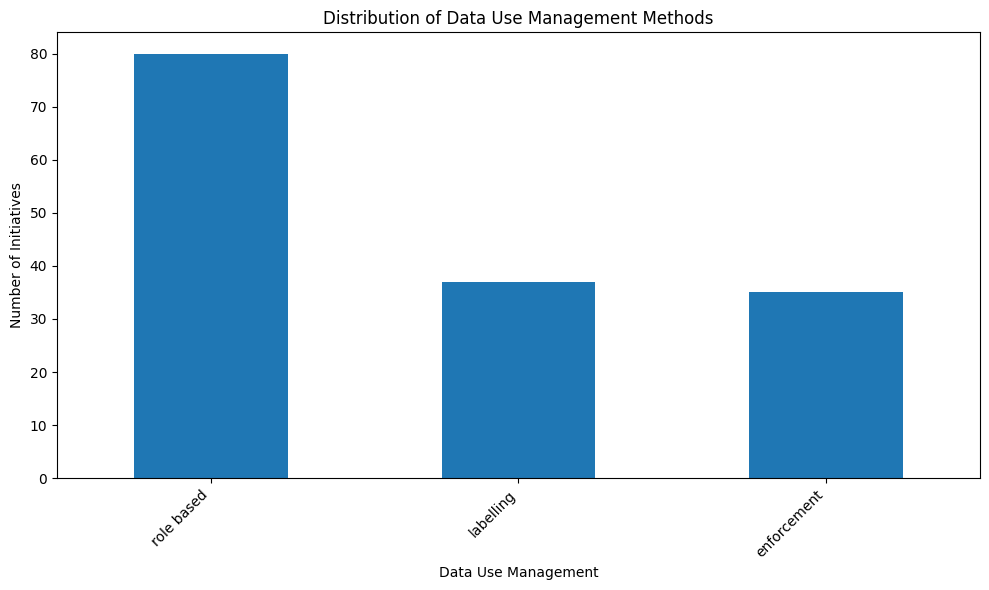

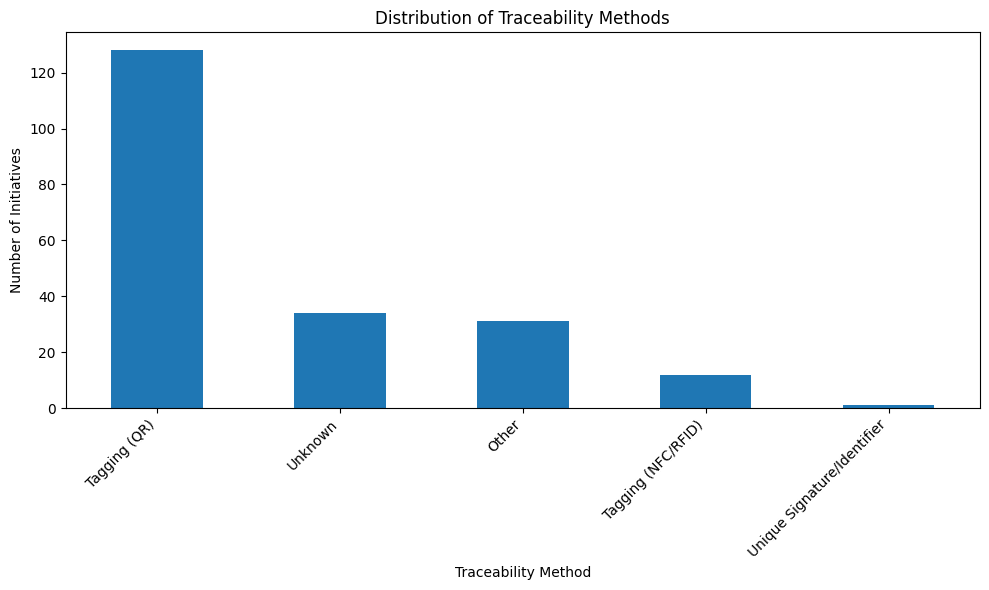

In [66]:
# Distribution of Traceability Methods
traceability_counts = df_cleaned['Traceability_Standardized'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
traceability_counts.plot(kind='bar')
plt.title('Distribution of Traceability Methods')
plt.xlabel('Traceability Method')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

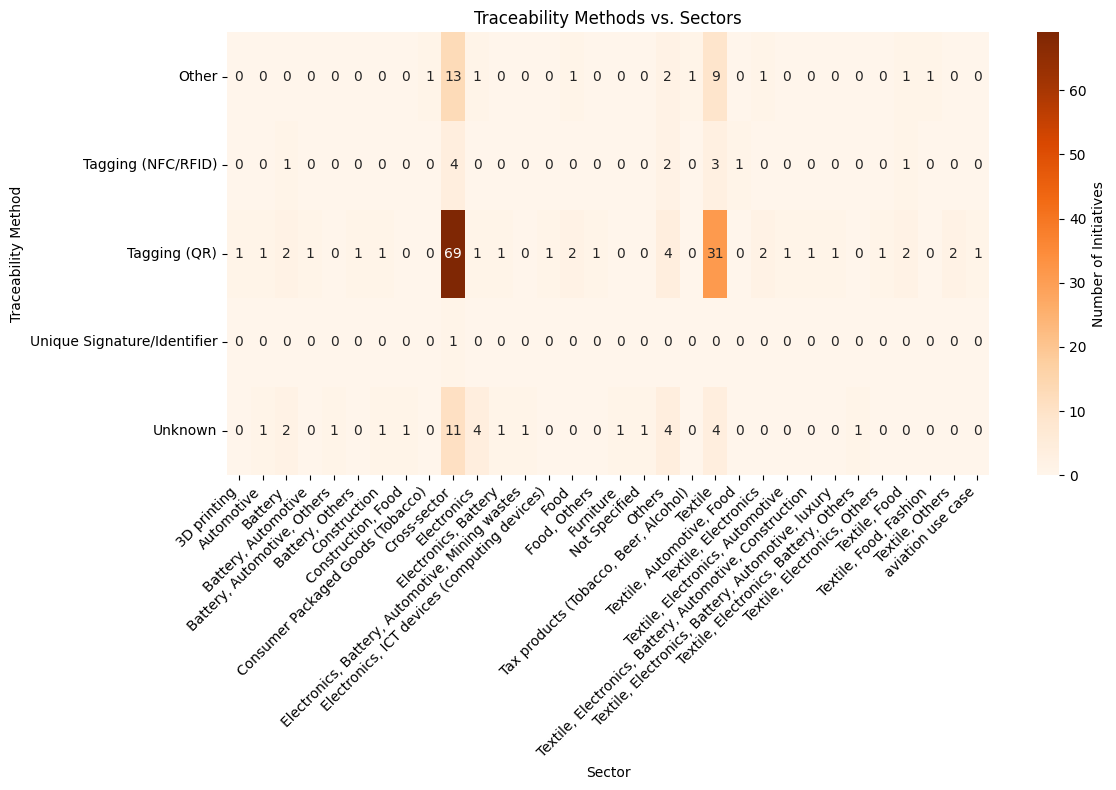

In [67]:
# Cross-tabulation: Traceability vs. Sector
traceability_sector_ct = pd.crosstab(df_cleaned['Traceability_Standardized'], df_cleaned['Sector_Grouped'])

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(traceability_sector_ct, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Traceability Methods vs. Sectors')
plt.xlabel('Sector')
plt.ylabel('Traceability Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

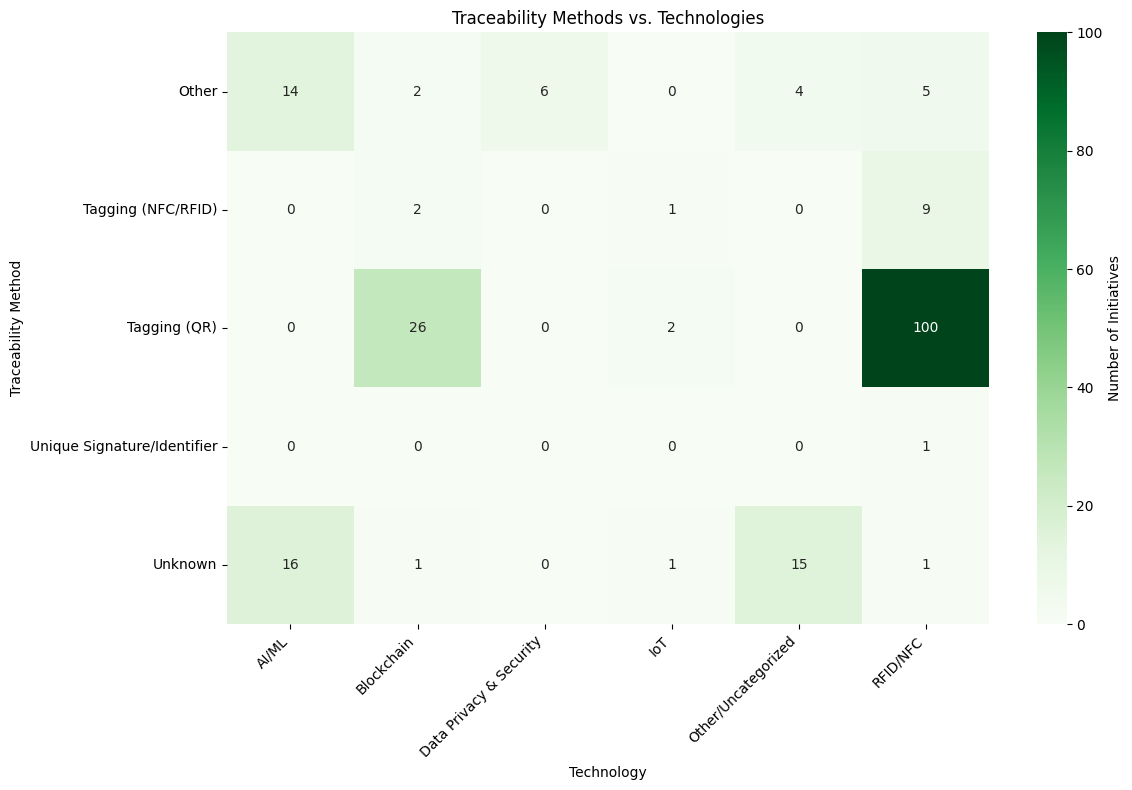

In [69]:
# Cross-tabulation: Traceability vs. Technology
traceability_tech_ct = pd.crosstab(df_cleaned['Traceability_Standardized'], df_cleaned['Technology_Category'])

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(traceability_tech_ct, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Traceability Methods vs. Technologies')
plt.xlabel('Technology')
plt.ylabel('Traceability Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Define keyword-based categories
goal_categories = {
    "Sustainability": ["sustainability", "sustainable", "carbon", "ecology", "green"],
    "Circularity": ["circular", "reuse", "recycling", "remanufacture"],
    "Transparency": ["transparency", "trace", "visibility"],
    "Compliance": ["compliance", "regulation", "law", "standard"],
    "Customer Engagement": ["engagement", "customer", "user"],
    "Efficiency": ["efficiency", "cost", "time", "optimization"],
    "Innovation": ["innovation", "new", "novel", "unique"]
}

# Function to classify goals
def classify_goals(goal_text):
    goal_text = str(goal_text).lower()  # Convert to lowercase
    for category, keywords in goal_categories.items():
        if any(keyword in goal_text for keyword in keywords):
            return category
    return "Other/Uncategorized"  # Default for unclassified goals

# Apply classification to the column
df_cleaned['Goal_Category'] = df_cleaned['Goal / USP / Benefit'].apply(classify_goals)

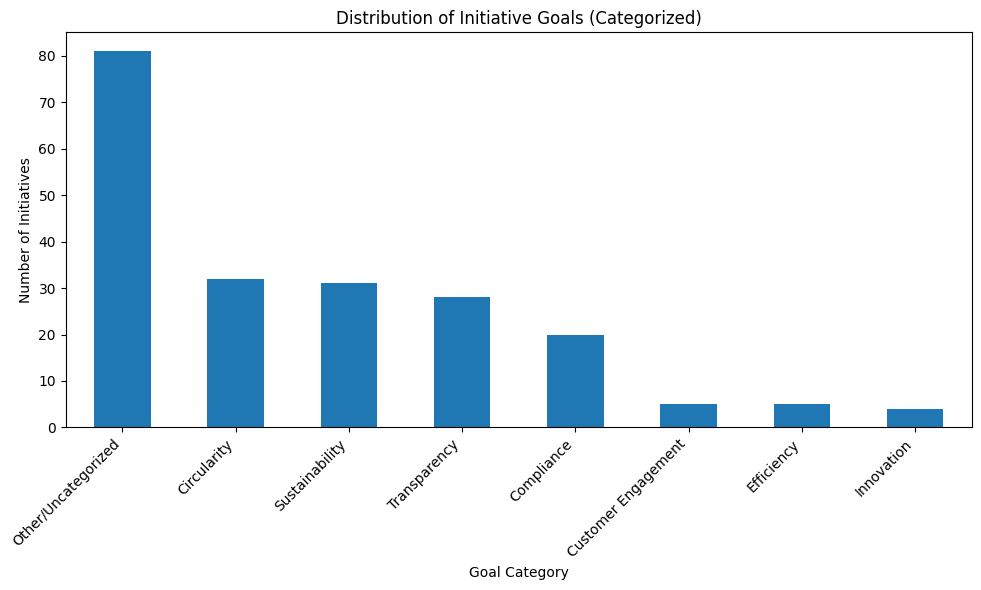

In [72]:
# Plot the distribution of goal categories
goal_counts = df_cleaned['Goal_Category'].value_counts()

plt.figure(figsize=(10, 6))
goal_counts.plot(kind='bar')
plt.title('Distribution of Initiative Goals (Categorized)')
plt.xlabel('Goal Category')
plt.ylabel('Number of Initiatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

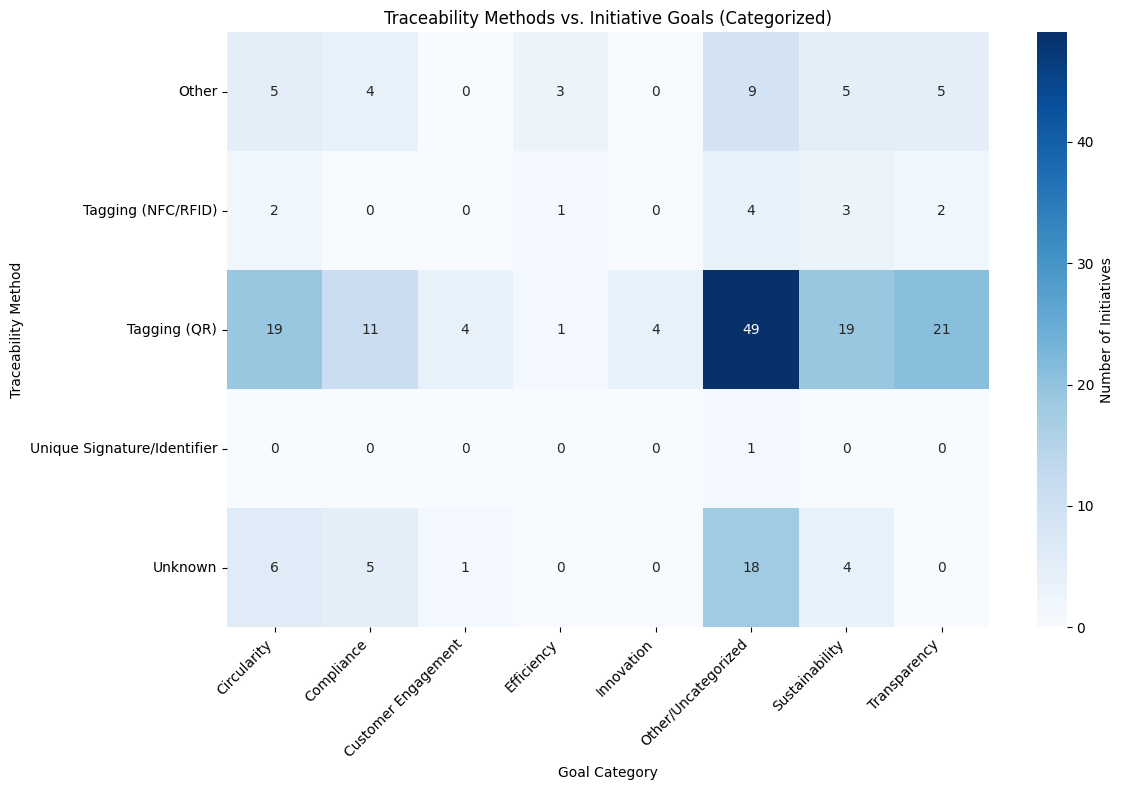

In [73]:
# Cross-tabulation: Traceability vs. Goals
traceability_goal_ct = pd.crosstab(df_cleaned['Traceability_Standardized'], df_cleaned['Goal_Category'])

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(traceability_goal_ct, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Initiatives'})
plt.title('Traceability Methods vs. Initiative Goals (Categorized)')
plt.xlabel('Goal Category')
plt.ylabel('Traceability Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

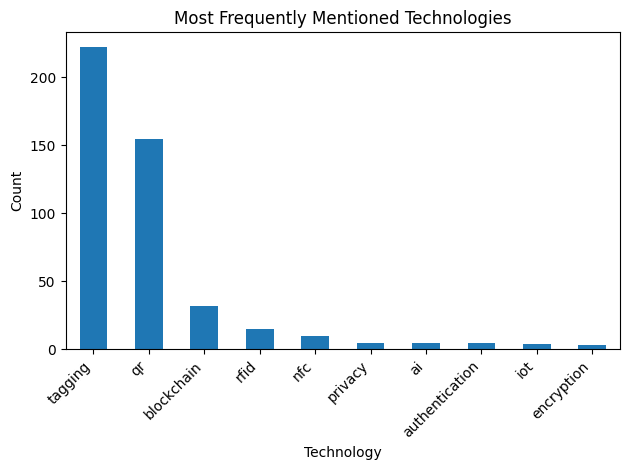

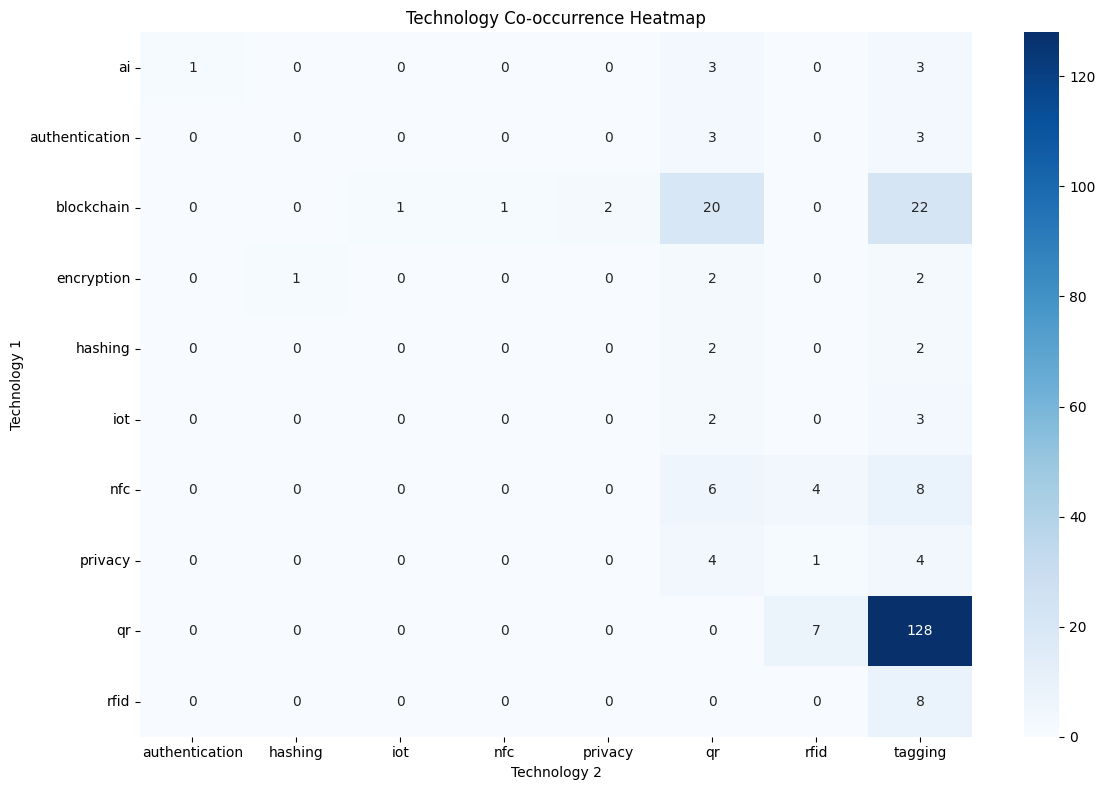

In [89]:
# Preprocessing the Tech_Description column
df_cleaned['Tech_Description_Cleaned'] = df_cleaned['Tech_Description'].apply(
    lambda x: re.sub(r'[^\w\s]', '', x.lower()) if isinstance(x, str) else ''
)

# Define technology-related keywords
technology_keywords = [
    "rfid", "nfc", "blockchain", "ai", "artificial intelligence", "iot",
    "internet of things", "machine learning", "encryption", "privacy",
    "tagging", "qr", "authentication", "data minimization", "hashing"
]

# Function to extract keywords
def extract_keywords(text, keywords):
    words = text.split()
    return [word for word in words if word in keywords]

# Apply the function to extract keywords
df_cleaned['Extracted_Tech_Keywords'] = df_cleaned['Tech_Description_Cleaned'].apply(
    lambda x: extract_keywords(x, technology_keywords)
)

# Flatten the list to count individual mentions
keyword_list = [keyword for sublist in df_cleaned['Extracted_Tech_Keywords'] for keyword in sublist]
keyword_counts = Counter(keyword_list)

# Convert to DataFrame for easier handling
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Technology', 'Count']).sort_values(by='Count', ascending=False)

# Visualize the most frequently mentioned technologies
plt.figure(figsize=(10, 6))
keyword_df.head(10).plot(kind='bar', x='Technology', y='Count', legend=False)
plt.title('Most Frequently Mentioned Technologies')
plt.ylabel('Count')
plt.xlabel('Technology')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Co-occurrence Analysis
co_occurrence = defaultdict(int)
for keywords in df_cleaned['Extracted_Tech_Keywords']:
    for combo in combinations(sorted(set(keywords)), 2):
        co_occurrence[combo] += 1

# Convert to DataFrame
co_occurrence_df = pd.DataFrame([{'Technology 1': k[0], 'Technology 2': k[1], 'Count': v} for k, v in co_occurrence.items()])

heatmap_data = co_occurrence_df.pivot(index='Technology 1', columns='Technology 2', values='Count').fillna(0)

# Visualize as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Technology Co-occurrence Heatmap')
plt.tight_layout()
plt.show()